Enter event cumulative rainfall till today in mm (E): 45
Enter No. of Rainfall event Days (D): 6
Enter cumulative Rainfall of previous 20 Days (AR20): 30
Enter cumulative Rainfall of previous 30 Days (AR30): 70


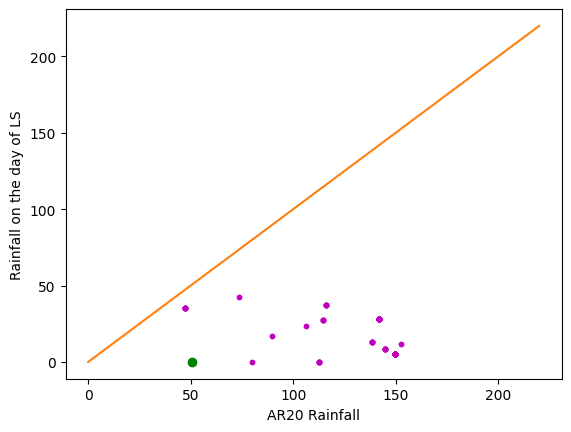

Landslides towards AR: 89 , Landslides towards LS day: 0 , THRESH 50.8201000868702


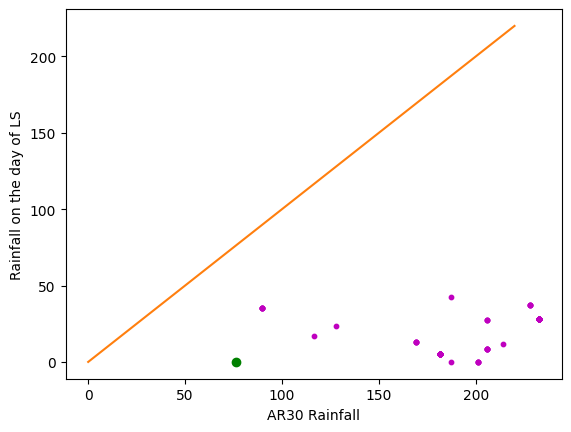

Landslides towards AR: 89 , Landslides towards LS day: 0 , THRESH 76.342750866579


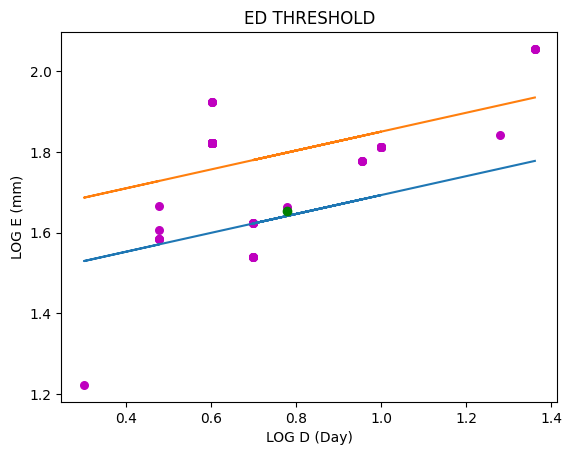

For this area cumulative event rainfall more than 43.799971009133365 mm can cause LS


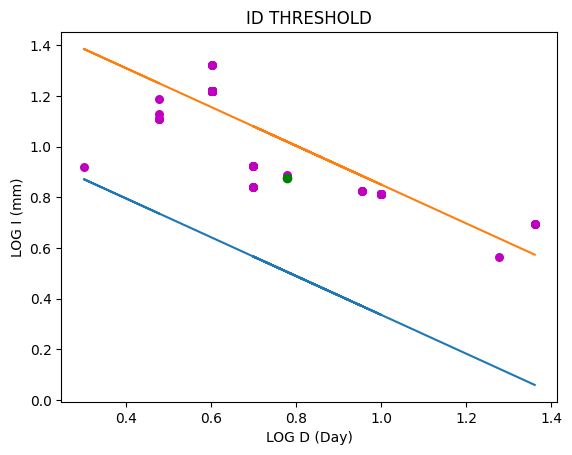

For this area rainfall intensity more than 3.2080893348063984 mm/day can cause LS
ED VOTE = 1
ID VOTE = 1
AR20 VOTE = 0
AR30 VOTE = 0


"There is a MEDIUM probability of Landslide occurence"!


In [ ]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import powerlaw
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#######

data2 = pd.read_csv("/content/mandi_ls_data.csv")

####


y = data2.iloc[:,1:]


######


y = np.array(y)

######
LS = []


for v in y:
    pp = []
    uu = 0
    for a in v:
        uu = uu + 1
        if a == 0:
            if uu == 1:
                continue
            else:
                break
        elif a != 0:
            pp.append(a)
    E2 = sum(pp)
    D2 = uu
    I2 = E2/D2


    LS.append([E2,D2,I2])


LS = np.array(LS)



######
user = input('Enter event cumulative rainfall till today in mm (E): ')
dayy = input('Enter No. of Rainfall event Days (D): ')
user2 = float(user)/float(dayy)
AR_20 = input('Enter cumulative Rainfall of previous 20 Days (AR20): ')
AR_30 = input('Enter cumulative Rainfall of previous 30 Days (AR30): ')

########
#FOR AR

ar_list = []

AR20 = []
AR30 = []


for K in y[:,1:21]:
    AR = sum(K)
    AR20.append(AR)

for S in y[:,1:31]:
    AR = sum(S)
    AR30.append(AR)


AR20 = np.array(AR20)


AR30 = np.array(AR30)

Y_AR = y[:,0]



standTWENTY = np.std(AR20)
twentyar = 3*standTWENTY - standTWENTY

plt.scatter(AR20, Y_AR, color = "m", marker = "o", s = 10)

plt.plot(220,220)

plt.plot(twentyar, 0, "go")

plt.plot([0,50,100,150,200,220],[0,50,100,150,200,220])

plt.xlabel('AR20 Rainfall')
plt.ylabel('Rainfall on the day of LS')
#plt.title('')
#plt.plot(AR_20, 0, "go")
plt.show()
c = 0
n = 0
while c < 89:
    if AR20[c] > Y_AR[c]:
        n = n + 1
    c = c + 1
print('Landslides towards AR:',n, ', Landslides towards LS day:', (89-n), ', THRESH', twentyar)

##################################################
standTHIRTY = np.std(AR30)
thirtyar = 3 * standTHIRTY - standTHIRTY
plt.scatter(AR30, Y_AR, color = "m", marker = "o", s = 10)
#plt.plot(AR_30, 0, "go")
plt.plot(220,220)
plt.plot(thirtyar, 0, "go")
plt.plot([0,50,100,150,200,220],[0,50,100,150,200,220])
plt.xlabel('AR30 Rainfall')
plt.ylabel('Rainfall on the day of LS')
#plt.title('')
plt.show()
c = 0
n = 0
while c < 89:
    if AR30[c] > Y_AR[c]:
        n = n + 1
    c = c + 1
print('Landslides towards AR:',n, ', Landslides towards LS day:', (89-n), ', THRESH', thirtyar)


###########################################
#FOR ED

x_data = LS[:,1]
y_data = LS[:,0]
yy_data = LS[:,2]

x = np.log10(x_data)
y = np.log10(y_data)
yy = np.log10(yy_data)



dayy = float(dayy)
user = float(user)
#FOR BEST FIT
beta, alpha = np.polyfit(x, y, deg = 1)
y_line = alpha + beta * x
stdd = np.std(y_line)
thresh_line = y_line - 3*(stdd)
elog = np.log10(user)
logday = np.log10(dayy)
betaaa, alphaaa = np.polyfit(x, thresh_line, deg = 1)
Threshold = alphaaa + betaaa * logday
THRESH1 = np.power(10,Threshold)

plt.scatter(x, y, color = "m", marker = "o", s = 30)
plt.plot(x, thresh_line)
plt.plot(x, y_line)
plt.plot(logday, elog, "go")
plt.xlabel('LOG D (Day)')
plt.ylabel('LOG E (mm)')
plt.title('ED THRESHOLD')
plt.show()

print('For this area cumulative event rainfall more than',THRESH1,'mm can cause LS')

#################################################

#FOR ID

plt.scatter(x, yy, color = "m", marker = "o", s = 30)
user2 = float(user2)
b, a = np.polyfit(x, yy, deg = 1)
y_linee = a + b * x
elog2 = np.log10(user2)
stddd = np.std(y_linee)
thresh_linee = y_linee - 3*(stddd)
ba, aa = np.polyfit(x, thresh_linee, deg = 1)
Threshold2 = aa + ba * logday
THRESH2 = np.power(10,Threshold2)

plt.plot(x, thresh_linee)
plt.plot(x, y_linee)
plt.plot(logday, elog2, "go")
plt.xlabel('LOG D (Day)')
plt.ylabel('LOG I (mm)')
plt.title('ID THRESHOLD')
plt.show()

print('For this area rainfall intensity more than',THRESH2,'mm/day can cause LS')
##################################
#VOTING

VOTE = 0

if user > THRESH1:
    VOTE = VOTE + 1
    print('ED VOTE = 1')

else:
    VOTE = 0
    print('ED VOTE = 0')



if user2 > THRESH2:
    VOTE = VOTE + 1
    print('ID VOTE = 1')

else:
    print('ED VOTE = 0')




AR_20 = float(AR_20)
twentyar = float(twentyar)

if AR_20 > twentyar:
    VOTE = VOTE + 1
    print('AR20 VOTE = 1')
else:
    print('AR20 VOTE = 0')



thirtyar = float(thirtyar)

AR_30 = float(AR_30)

if AR_30 > thirtyar:
    VOTE = VOTE + 1
    print('AR30 VOTE = 1')
else:
    print('AR30 VOTE = 0')


if VOTE == 0:
    print('\n\n"There is 0 % probability of Landslide occurence":)')
elif VOTE == 1:
    print('\n\n"There is a LOW probability of Landslide occurence":)')
elif VOTE == 2:
    print('\n\n"There is a MEDIUM probability of Landslide occurence"!')
elif VOTE == 3:
    print('\n\n"There is a HIGH probability of Landslide occurence"!!')
elif VOTE == 4:
    print('\n\n"There is a VERY HIGH probability of Landslide occurence"!!!! :0')
